In [1]:
#UNA EXPLICACION DE LA PARAMETRIZACION EN:
#https://blog.paperspace.com/working-with-different-genetic-algorithm-representations-python/

import pygad
import numpy
import pandas

# Params
print("Ingrese:")

# Population
initial_population = 50 
#int(input("Tamaño población: ")) #50

# Mutations
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 5
#mutation_percent_genes = int(input("Mutación: ")) #5%

# Generations
num_generations = 100
#num_generations = int(input("Num Generaciones: ")) #100
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# Solutions
sol_per_pop = 50 # Number of solutions in the population.

# Parents
parent_selection_type = "tournament"  # Type of parent selection.
keep_parents = 7 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.
crossover_type = "single_point" # Type of the crossover operator.

# Archive's url
url_archive = "https://raw.githubusercontent.com/GodorhinoHub/Solemne2-COVID/main/archivo.txt"
#url_archive = input("Ubicación web del archivo: ")

Ingrese:


In [2]:
# Reading archive
mapa = numpy.array(pandas.read_csv(url_archive,header = None))

# Define cromosomas xd coman mamey
num_genes = mapa.size

In [3]:
# Make the 1Dsolution a 2D array and delete the people in the wrong place
def dimensionar1(soluciones):
    personas = numpy.zeros(mapa.shape)
    posicion = 0
    for j in range(mapa.shape[0]):
        for i in range(mapa.shape[1]):
            if(mapa[j][i] == 'X'):
                personas[j][i] = soluciones[posicion]
            elif(mapa[j][i] != 'X' and soluciones[posicion] == 1):
                personas[j][i] = 0
            posicion += 1
    return personas              

# Delete people who are in the tables lefting only one
def revisarMu(personas):
    jp = mapa.shape[0]
    ip = mapa.shape[1]
    for j in range(mapa.shape[0]):
        for i in range(mapa.shape[1]):
            p = 0
            if(mapa[j][i] == 'M'):
                if(i+1 <= (ip-1) and personas[j][i+1] == 1):
                    p += 1
                    if(p > 1): personas[j][i+1] = 0
                if(i-1 >= 0 and personas[j][i-1] == 1):
                    p += 1
                    if(p > 1): personas[j][i-1] = 0
                if(j+1 <= (jp-1) and personas[j+1][i] == 1):
                    p += 1
                    if(p > 1): personas[j+1][i] = 0
                if(j-1 >= 0 and personas[j-1][i] == 1):
                    p += 1
                    if(p > 1): personas[j-1][i] = 0
                if(j+1 <= (jp-1) and i+1 <= (ip-1) and personas[j+1][i+1] == 1):
                    p += 1
                    if(p > 1): personas[j+1][i+1] = 0
                if(j+1 <= (jp-1) and i-1 >= 0 and personas[j+1][i-1] == 1):
                    p += 1
                    if(p > 1): personas[j+1][i-1] = 0
                if(j-1 >= 0 and i+1 <= (ip-1) and personas[j-1][i+1] == 1):
                    p += 1
                    if(p > 1): personas[j-1][i+1] = 0
                if(j-1 >= 0 and i-1 >= 0 and personas[j-1][i-1] == 1):
                    p += 1
                    if(p > 1): personas[j-1][i-1] = 0
    return personas

# Delete people who aren't respecting the social distance
def distanciaS(personas):
    jp = mapa.shape[0]
    ip = mapa.shape[1]
    for j in range(jp): # fila
        for i in range(ip): # columna
            if(personas[j][i] == 1):
                if((i-1 >= 0 and personas[j][i-1] == 1) or
                   (i+1 <= (ip-1) and personas[j][i+1] == 1) or
                   (j-1 >= 0 and personas[j-1][i] == 1) or
                   (j+1 <= (jp-1) and personas[j+1][i] == 1) or
                   (j-1 >= 0 and i-1 >= 0 and personas[j-1][i-1] == 1) or
                   (j-1 >= 0 and i+1 <= (ip-1) and personas[j-1][i+1] == 1) or
                   (j+1 <= (jp-1) and i-1 >= 0 and personas[j+1][i-1] == 1) or
                   (j+1 <= (jp-1) and i+1 <= (ip-1) and personas[j+1][i+1] == 1)):
                    personas[j][i] = 0
                else:
                    personas[j][i] = 1
    return personas

# Delete people who aren't respecting the social distance
def planoFinal(solucion):
    planoVacio = numpy.empty(mapa.shape,dtype=str)
    for j in range(mapa.shape[0]):
        for i in range(mapa.shape[1]):
            if(mapa[j][i] != 'X'):
                planoVacio[j][i] = mapa[j][i]
            if(mapa[j][i] == 'X'):
                planoVacio[j][i] = solucion[j][i]
    return planoVacio

# Starting the program
#input("Programa listo, presione enter para iniciar")

Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
Generation = 1 ,   Fitness Best   = 15.000 ,   Change     = 15.000
Generation = 2 ,   Fitness Best   = 15.000 ,   Change     = 0.000
Generation = 3 ,   Fitness Best   = 16.000 ,   Change     = 1.000
Generation = 4 ,   Fitness Best   = 16.000 ,   Change     = 0.000
Generation = 5 ,   Fitness Best   = 16.000 ,   Change     = 0.000
Generation = 6 ,   Fitness Best   = 17.000 ,   Change     = 1.000
Generation = 7 ,   Fitness Best   = 17.000 ,   Change     = 0.000
Generation = 8 ,   Fitness Best   = 17.000 ,   Change     = 0.000
Generation = 9 ,   Fitness Best   = 18.000 ,   Change     = 1.000
Generation = 10 ,   Fitness Best   = 18.000 ,   Change     = 0.000
Generation = 11 ,   Fitness Best   = 18.000 ,   Change     = 0.000
Generation = 12 ,   Fitness Best   = 19.000 ,   Change     = 1.000
Generation = 13 ,   Fitness Best

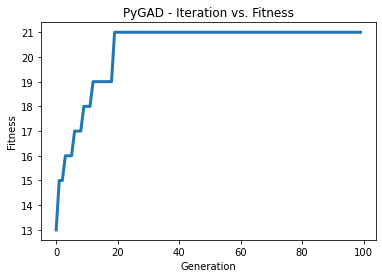

In [4]:
# Fitness function
def fitness_func(solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = distanciaS(revisarMu(dimensionar1(solution)))
    return numpy.sum(fitness)

fitness_function = fitness_func
last_fitness = 0

# Function that repeats every generation, shows the best of
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed),
    ",   Fitness Best   = {fitness:.3f}".format(fitness=ga_instance.best_solution()[1]),
    ",   Change     = {change:.3f}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_function,
                       parent_selection_type=parent_selection_type,
                       gene_space=[0, 1],
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       callback_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :")
print(planoFinal(distanciaS(revisarMu(dimensionar1(solution)))))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()